## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 35 columns):
DAMAGE_PROPERTY       8308 non-null float64
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 1 columns):
DAMAGE_PROPERTY    8308 non-null float64
dtypes: float64(1)
memory usage: 65.0 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 34 columns):
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP       8308 non-null float64
WOOD_WETLAND_PR

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
 0.5790
 0.1532
 0.2814
[torch.DoubleTensor of size 8308x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
 0.5451 -0.2386  0.6373  ...  -1.0297  0.1597 -1.5301
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.DoubleTensor of size 8308x34]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
 0.5451 -0.2386  0.6373  ...  -1.0297  0.1597 -1.5301
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.FloatTensor of size 8308x34]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

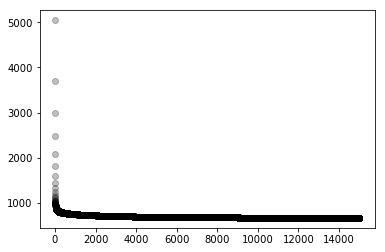

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8308)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

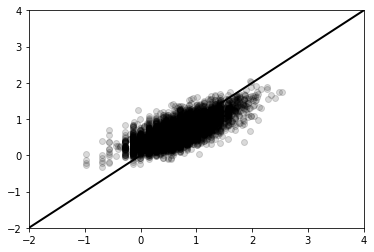

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 1 columns):
DAMAGE_PROPERTY    2808 non-null float64
dtypes: float64(1)
memory usage: 22.0 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 34 columns):
DURATION_SECONDS      2808 non-null float64
BEGIN_LAT             2808 non-null float64
BEGIN_LON             2808 non-null float64
TOR_LENGTH            2808 non-null float64
TOR_WIDTH             2808 non-null float64
YEAR                  2808 non-null float64
MULTI_VORT_IND        2808 non-null int64
OPEN_WATER_PROP       2808 non-null float64
DEV_OPEN_PROP         2808 non-null float64
DEV_LOW_PROP          2808 non-null float64
DEV_MED_PROP          2808 non-null float64
DEV_HIGH_PROP         2808 non-null float64
BARREN_LAND_PROP      2808 non-null float64
DECID_FOREST_PROP     2808 non-null float64
EVERGR_FOREST_PROP    2808 non-null float64
MIXED_FOREST_PROP     2808 non-null float64
SHRUB_SCRUB_PROP      2808 non-null float64
GRASS_LAND_PROP       2808 non-null float64
PASTURE_HAY_PROP      2808 non-null float64
CULT_CROPS_PROP       2808 non-null float64
WOOD_WETLAND_PR

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 287.1010
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3961
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2808)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

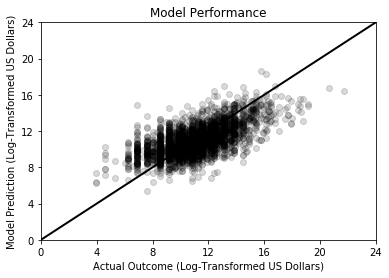

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [24]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1293 -0.0361  0.0178  0.0922 -0.0673 -0.2762  0.1464 -0.0648  0.1812 -0.1186
-0.1448  0.1358  0.0482 -0.2372  0.1882  0.0036 -0.1699 -0.1674 -0.0589  0.0679
-0.0425  0.1568 -0.0643 -0.0423  0.1593 -0.1894  0.2044  0.0901 -0.3193 -0.0695
-0.0654 -0.2447  0.0738 -0.3752  0.1361 -0.0043 -0.0449 -0.0604 -0.2390  0.1117
 0.2168  0.3030  0.0119  0.0721  0.0440 -0.1560  0.7461 -0.0245 -0.1986 -0.2314
-0.1048 -0.0843 -0.1337  0.0862 -0.1060  0.3391  0.0297 -0.0757 -0.1176 -0.0386
-0.2057  0.3050  0.1703 -0.2902 -0.1312 -0.2369  0.1068 -0.1434 -0.2874 -0.0072
-0.1151 -0.2863 -0.2004  0.1066 -0.0389  0.3313 -0.4817  0.0652  0.1776  0.0875
 0.0539 -0.2794 -0.2332 -0.0399  0.2170 -0.0121 -1.2387 -0.1255  0.0994 -0.1388
 0.0507 -0.4531  0.0102  0.1999 -0.1070 -0.1408 -0.1262 -0.1251 -0.0595  0.1439
 0.0189  0.1540 -0.0858 -0.2894  0.1839 -0.1411  0.1581 -0.2060  0.1209 -0.2642
 0.0409  0.3279 -0.0576 -0.0685 -0.0436 -0.0710  0.0044 -0.0966  0.4050 -0.2820
 

In [25]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.3664 -0.2239 -0.2056 -0.3463  0.1898 -0.3544  0.3396  0.2926  0.1550  0.3092

Columns 10 to 19 
-0.2737 -0.2294  0.3342  0.1801 -0.2147 -0.1802 -0.2322  0.1902  0.2452 -0.3303

Columns 20 to 22 
 0.1856  0.3447  0.1951
[torch.FloatTensor of size 1x23]

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

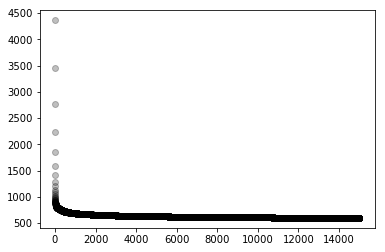

In [29]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

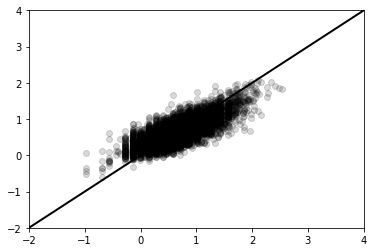

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [32]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 294.0213
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3815
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

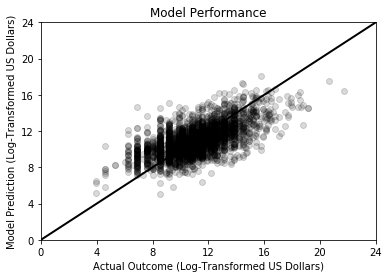

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [36]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0811 -0.0688  0.1233  0.2330 -0.2766 -0.0379  0.4128  0.1665  0.2739 -0.0168
 0.0206  0.3031  0.2732 -0.1921  0.1582 -0.1253 -0.0293 -0.0088 -0.1350 -0.2255
-0.1027 -0.0075 -0.0446  0.4414  0.0365 -0.2048  0.1061  0.1838  0.3114 -0.0945
 0.1325 -0.0934 -0.2002 -0.1328  0.0937 -0.0570  0.2033  0.2302 -0.0412 -0.1277
 0.0682  0.0371 -0.0158 -0.1377 -0.0539  0.3867  0.2058 -0.0300 -0.2115  0.1750
-0.2941 -0.2101 -0.0237 -0.1608 -0.0923 -0.1500 -1.1435  0.0915 -0.0301  0.0098
-0.0658  0.2359 -0.1413  0.2143  0.2503 -0.0148 -0.4627  0.0092  0.1392 -0.2963
 0.0245  0.0467 -0.0057  0.1125 -0.1453  0.0326 -0.0119 -0.1035  0.1370 -0.0312
-0.0196 -0.0843  0.2180  0.2677 -0.2446  0.0586 -0.5114  0.0459  0.1280  0.0402
-0.0836  0.3518 -0.0880  0.3690  0.1228 -0.0547  0.3411 -0.0831 -0.0879  0.1468
 0.3212  0.2083  0.0132  0.4007  0.0972 -0.2358 -0.0610  0.1863  0.1282  0.1408
 0.0494 -0.1186  0.0305  0.2647  0.1122 -0.0396  0.2200  0.1438 -0.1296  0.2406
-

In [37]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0431 -0.0245  0.0101  0.0153 -0.3710 -0.3129 -0.1870 -0.0352  0.0683  0.1332
-0.0773 -0.3444  0.1830 -0.1091 -0.3966  0.0951  0.2124 -0.2956 -0.3540  0.1884
-0.1578  0.3688  0.4173 -0.1033  0.1323 -0.0793 -0.1239  0.1018  0.3594 -0.0924
 0.0652  0.1666  0.0086  0.0120 -0.0196  0.3606  0.2571 -0.0434 -0.1044 -0.0048
-0.0344  0.0593 -0.0843  0.0874 -0.1682  0.1299 -0.0007 -0.1045 -0.2108  0.1925
 0.1333 -0.2496 -0.1234 -0.1056  0.0550  0.2460  0.1103 -0.1763 -0.3525  0.2601
 0.2393 -0.1907  0.5497 -0.6701  0.2065 -0.0043 -0.0770  0.2887 -0.3701  0.0773
-0.5036 -0.3006 -0.2158  0.3561 -0.2631 -0.0165  0.1674 -0.0415  0.2523  0.0185
-0.0141  0.1424  0.1809 -0.2404 -0.0516 -0.3265 -0.4790  0.1536  0.2516 -0.4755
 0.1578 -0.2831 -0.1518 -0.5106  0.1964 -0.3888 -0.1053 -0.1939 -0.0860  0.2069
 0.1984 -0.0727 -0.1008  0.1154 -0.1712  0.2475  0.1024  0.0665 -0.0650  0.0912
 0.2442  0.2792  0.0336  0.3069 -0.2496  0.1338 -0.1527  0.0056  0.1999  0.0412
-

In [38]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2071  0.6026  0.6506  0.1958  0.2197  0.3327 -1.0165 -0.4315 -0.4935 -0.2497

Columns 10 to 14 
 0.2370  0.4085  0.5372  0.3931 -0.3491
[torch.FloatTensor of size 1x15]

## Round 3: Three-Hidden-Layer Neural Network

In [39]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [40]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [41]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

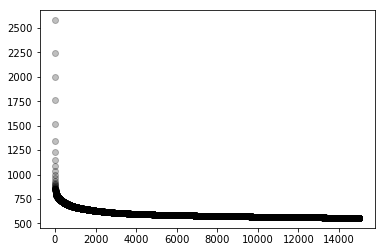

In [42]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [43]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

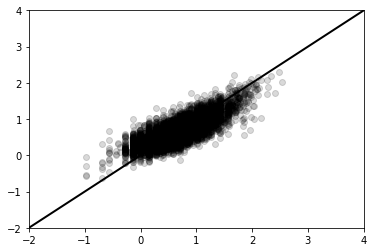

In [44]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [45]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 300.9576
[torch.FloatTensor of size 1]

In [46]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3669
[torch.FloatTensor of size 1]

In [47]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

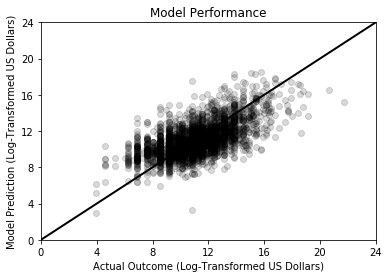

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [49]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1030 -0.3343 -0.0574  0.3494 -0.1136 -0.0793  0.4840  0.1215  0.0449  0.2709
-0.2241 -0.0260  0.0047  0.3161 -0.2871  0.2161 -0.2042 -0.2979  0.0369  0.0762
 0.3578 -0.3921 -0.0963 -0.0159  0.1230  0.0239  0.1559 -0.1053  0.2493 -0.0940
 0.0571  0.3797  0.2959 -0.0808  0.1166 -0.4337  0.1850 -0.2859  0.2149 -0.0953
-0.0155  0.0675 -0.2702 -0.2937  0.1496 -0.2420  0.3243  0.2257  0.2353 -0.6411
-0.1649 -0.0108 -0.0449 -0.0224 -0.0109 -0.1833  0.0432  0.0645 -0.0860 -0.0412
-0.0119 -0.1106 -0.2526 -0.1409  0.1143  0.0855  0.2926  0.0281 -0.4054 -0.1714
 0.1200  0.5489  0.1971  0.0272 -0.0654  0.0986  0.0985  0.0702  0.0540  0.1787
 0.3395  0.0293 -0.4276 -0.2348  0.3050  0.0384 -0.4144 -0.1139  0.3212  0.0590
-0.2342 -0.0597 -0.0414  0.2551  0.0415 -0.1570 -0.2070  0.1774 -0.0887 -0.2039
 0.0474 -0.0041  0.0178  0.2660  0.0547  0.2372  0.0451  0.1514  0.0188 -0.1137
 0.2374  0.1868  0.2037  0.1241  0.1182 -0.1949 -0.0405 -0.1266 -0.2178 -0.1201
-

In [50]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.2234  0.4086  0.1784  0.3746 -0.0298  0.0866 -0.4452 -0.0104  0.1819  0.0889
 0.0340  0.2528  0.0024  0.0727  0.2793 -0.3643 -0.3628 -0.1052  0.5251  0.3036
 0.3627 -0.2150  0.0040  0.1732 -0.2627 -0.2177 -0.2731  0.2036 -0.2680 -0.0190
 0.1369 -0.0633 -0.0971 -0.0737  0.4503  0.1358 -0.0327 -0.2412  0.1264  0.1086
 0.0170  0.0306  0.2118  0.2450 -0.1464 -0.2808 -0.0852  0.0105  0.2709 -0.2457
 0.0688 -0.4220 -0.5185 -0.1475  0.1920  0.1594 -0.0858 -0.5798 -0.3253 -0.4977
-0.0188 -0.2439  0.2081  0.3917 -0.1842 -0.0817 -0.1783  0.1111 -0.3030  0.2905
 0.1746 -0.2455 -0.0920  0.2596  0.2231 -0.0142 -0.1102  0.0469 -0.1117  0.1241
 0.1112 -0.2508  0.2805  0.4103  0.0387  0.3272 -0.2355 -0.2682  0.1083 -0.1130
 0.3197 -0.1852 -0.1628 -0.3142  0.2748 -0.3139 -0.0571 -0.1137 -0.1038  0.2644
-0.1079 -0.2202  0.1902 -0.1983  0.2159 -0.0154 -0.0240  0.1138  0.0895  0.1070
-0.1508  0.0751  0.2068  0.0175  0.2189 -0.0164 -0.1355  0.1504  0.1387 -0.1195
-

In [51]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2258 -0.1459  0.0452  0.0975 -0.2819  0.5019  0.0028  0.3699  0.1944 -0.2285
 0.2879  0.0911  0.4358 -0.1321  0.0453 -0.5142  0.0389  0.1056  0.2697  0.1594
-0.3487  0.2380 -0.0954  0.0004 -0.0411 -0.5672  0.0659  0.0680 -0.0847 -0.0273
-0.2914  0.3748  0.1703 -0.2227  0.1986 -0.2459  0.2337 -0.5015  0.1148  0.0899
 0.3893 -0.4836  0.0675  0.3621  0.3363  0.1553 -0.0118 -0.6211 -0.0338 -0.9826
 0.1187  0.2215  0.4045 -0.1389 -0.1165 -0.4708  0.2486  0.2196  0.1783  0.1001
-0.4399  0.3612 -0.0261 -0.4925 -0.4730 -0.0276  0.1046  0.1841  0.4718  0.1540
-0.6304  0.1349  0.3723 -0.3931 -0.2639  0.3060 -0.1688  0.1966  0.3332  0.3329
 0.0718  0.2704  0.1345 -0.2674  0.0704  0.2450  0.3458  0.1455 -0.0393 -0.3519
-0.8253  0.2980  0.2004 -0.3588 -0.6284 -0.1513 -0.2991  0.0080  0.3128  0.3289

Columns 10 to 14 
-0.1953  0.2104  0.3396  0.3263 -0.2222
-0.0258  0.1898 -0.4739 -0.2690  0.1312
 0.1337  0.3303  0.1909  0.2278  0.1230
-0.2957 -0.6247  0.259

In [52]:
model[(6)].weight

Parameter containing:
-0.3814  0.2487  0.1951 -1.0536 -1.0422  0.3568  0.5056  0.4936 -0.4714  0.7860
[torch.FloatTensor of size 1x10]

## Round 4: Four-Hidden-Layer Neural Network

In [53]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [54]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [55]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

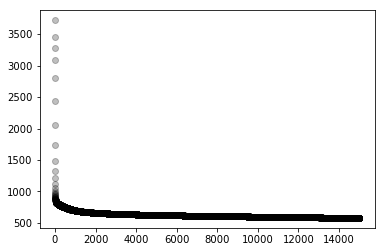

In [56]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

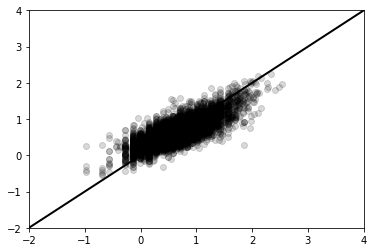

In [58]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [59]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 310.7958
[torch.FloatTensor of size 1]

In [60]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3462
[torch.FloatTensor of size 1]

In [61]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

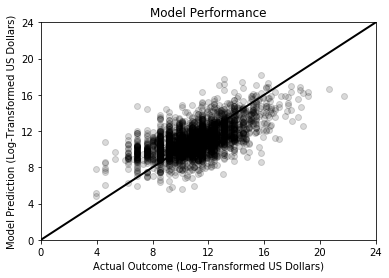

In [62]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [63]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
 1.8395e-01  3.8708e-01 -2.7807e-01  1.0631e-01  1.3203e-01  1.7836e-01
-1.6799e-01  1.7958e-01  2.7357e-01 -4.5509e-02  1.1464e-01 -2.2123e-01
 3.5094e-02  5.5754e-02  6.9121e-02  5.8112e-02  7.6476e-02 -9.1790e-02
-6.7366e-02  3.5358e-01  1.5653e-01  4.8489e-01 -1.6322e-01  2.8603e-01
 9.9503e-02 -1.9197e-01 -2.0198e-01  6.7409e-02  2.4766e-01  3.6110e-01
-1.0013e-01 -4.7630e-01 -1.5620e-01 -1.2083e-01  1.0325e-01  5.8653e-02
 2.0804e-03 -1.5177e-01  5.3696e-02  7.1840e-02 -1.0619e-01  1.9553e-01
-2.2143e-01  1.0230e-01 -1.2052e-01 -1.6218e-01 -1.6357e-01  3.2583e-01
 2.7041e-01 -9.9594e-02 -1.2303e-02 -9.4946e-02  1.2106e-01  1.0130e-01
 4.7697e-02 -6.2589e-04 -9.9994e-02 -1.4428e-01  1.8471e-01  5.7301e-01
 5.8319e-02 -2.5610e-02 -1.8055e-01  3.1498e-01 -3.4226e-02 -1.8319e-01
 2.5305e-01 -1.6167e-01 -2.9745e-02  1.3875e-02 -1.2363e-01  3.5117e-01
 7.5792e-02  4.6941e-01  1.0444e-01 -2.3762e-01  1.6104e-01  3.1920e-04
 1.7905e-01  1.8841e-01 -

In [64]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2300 -0.0298  0.1612  0.4956  0.1133  0.0758 -0.1857  0.4369  0.2856  0.3018
 0.2364  0.0113  0.1364  0.0367  0.1399 -0.1395  0.0311  0.2387 -0.1779 -0.4097
 0.2423  0.3572  0.1191  0.1045 -0.0863  0.0002 -0.0292  0.0273  0.0789 -0.0664
-0.0423 -0.0271  0.4700 -0.4196  0.0299  0.1122  0.1167  0.7993  0.2604 -0.3511
-0.0355 -0.2119  0.0380 -0.0544  0.0504  0.0182  0.1044 -0.0309 -0.0911  0.1841
 0.5392 -0.0767 -0.1067  0.1682  0.1380  0.2324 -0.1523  0.1160  0.0756  0.1510
-0.2354  0.1927  0.1774  0.3113  0.1430  0.2257  0.0879 -0.0731 -0.0909 -0.1527
 0.1155  0.0416  0.3391 -0.2415  0.0455  0.1530  0.3229  0.4283  0.1809 -0.1749
-0.1399  0.3294 -0.2425  0.0202  0.0421  0.1709 -0.1028  0.1936  0.1922 -0.2157
-0.1800  0.1102 -0.5320 -0.0493  0.2463 -0.0655  0.3377  0.1709 -0.5633 -0.4436
 0.2727 -0.3061 -0.1050 -0.4541  0.3585 -0.6135  0.2239 -0.0091 -0.0227  0.0020
-0.1440 -0.2923 -0.1193  0.3857  0.3910 -0.1826 -0.2688  0.0104  0.1465  0.3901
 

In [65]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.5084  0.7793  0.3134 -1.1570 -0.3065 -0.1969 -0.1150 -0.3760 -0.4371  0.8011
 0.0178  0.1837  0.1255 -0.0467 -0.0400 -0.2646 -0.0849  0.0812 -0.0981  0.1817
 0.4795  0.5965  0.2150 -0.0919  0.2625 -0.0766  0.2146  0.4262  0.1978 -0.5448
-0.0639  0.0446  0.1855  0.0421 -0.0903  0.1228  0.0587 -0.1941  0.2564  0.5072
 0.4134  0.2476 -0.1606  0.1170  0.2205  0.1743 -0.1407  0.0658  0.2737 -1.1041
 0.2085 -0.1003 -0.2319  0.0091 -0.2617  0.1786  0.2244 -1.0960  0.0149  0.0075
 0.0481  0.0232  0.2783  0.3840  0.0438  0.3013  0.2014 -0.1459  0.3682  0.0993
-0.1436  0.6589  0.2736  0.0036  0.0860 -0.0099  0.3164 -0.3900  0.0906 -0.2599
-0.0165 -0.4431  0.0779 -0.0646 -0.1750  0.2214 -0.1602  0.1496  0.3943  0.3006
-0.1062 -0.8369 -0.0215  0.5650 -0.3064  0.3885 -0.0635 -0.1122  0.1752 -0.2074

Columns 10 to 14 
 0.3920 -0.0938  0.2416 -0.4231  0.5859
 0.0344 -0.1767 -0.1400 -0.0139 -0.0658
 0.7844 -0.4742  0.1369  0.3154 -0.5525
 0.7696 -1.0317 -0.044

In [66]:
model[(6)].weight

Parameter containing:
 1.8500 -0.1057 -0.6107 -0.1258 -0.3995  0.2707  0.1247 -0.3509  0.3862  0.1291
-0.7935 -0.2001  0.1263  0.2168  0.0848 -0.7096  0.3188 -0.1580 -0.1450  0.4792
 1.5403  0.1984  0.2372  0.0555  0.2232 -0.1181 -0.3145  0.1274  0.2624  0.1760
-2.9674  0.2688 -0.4832  0.0625 -0.1475  0.6820  0.2770  0.0257  0.4180  0.4225
-1.8632  0.2021 -0.2679  0.3897  0.2706 -0.4257 -0.0053  0.2447  0.0482 -0.0257
-1.0418  0.1607  0.3675  0.2371  0.3998 -0.9300  0.3782  0.0334 -0.1816  0.4543
 0.2612  0.1533  0.1499  0.0932  0.1420  0.3644 -0.0666 -0.6285 -0.3664 -0.0004
[torch.FloatTensor of size 7x10]

In [67]:
model[(8)].weight

Parameter containing:
-0.5713  0.1788 -0.0383 -0.9561  0.2393  0.4169 -0.7494
[torch.FloatTensor of size 1x7]

## Round 5: Five-Hidden-Layer Neural Network

In [68]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [69]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [70]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

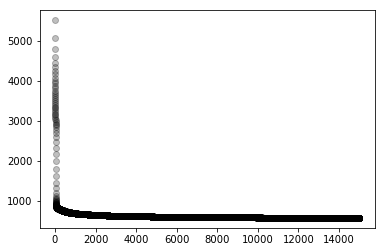

In [71]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

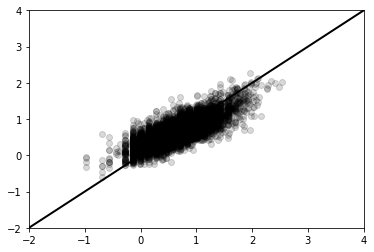

In [73]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1 Validation Set Performance

In [74]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 323.3643
[torch.FloatTensor of size 1]

In [75]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3198
[torch.FloatTensor of size 1]

In [76]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

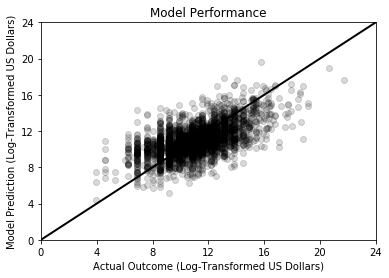

In [77]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [78]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.2182 -0.4219  0.3716 -0.0971 -0.2714  0.0741 -0.1125  0.0353 -0.0185 -0.1322
-0.0826  0.3484  0.3158 -0.1121 -0.0825 -0.2816 -0.6035  0.0168 -0.2058  0.3940
-0.0337  0.4868 -0.1311  0.0714  0.2188 -0.2524 -0.3371 -0.1019  0.2469 -0.0456
-0.0473 -0.5156 -0.0917  0.0244 -0.1525 -0.0931 -0.6882 -0.2185 -0.0487  0.0288
 0.4070 -0.0566  0.0972 -0.2165  0.1745  0.0984  0.9750  0.3439  0.2515  0.0346
 0.0307  0.0798  0.2203 -0.0476 -0.1051  0.2349 -0.0887  0.0309 -0.0973 -0.0284
-0.0588 -0.2468 -0.1186 -0.1552 -0.0308  0.1705 -1.4010 -0.0931  0.2268  0.3346
 0.0118  0.3100 -0.1845  0.2570  0.1948  0.1928  1.0118 -0.1572  0.0113 -0.1038
 0.0753  0.1975 -0.0733  0.1628  0.3380  0.3002  0.3449 -0.0726  0.1618 -0.4336
-0.0651  0.0670 -0.0968 -0.0498  0.3729 -0.0042  0.2399 -0.1109 -0.0927  0.2480
 0.1501  0.5012 -0.3006  0.0973  0.1131  0.3669 -0.5750 -0.0450  0.2678  0.0036
-0.1116 -0.1686  0.0513 -0.1015  0.3703  0.6607 -0.1324 -0.0810 -0.0470 -0.5469
-

In [79]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0505  0.4311  0.2469  0.1335 -0.0137  0.2389  0.0900  0.3123  0.3508  0.1684
 0.1923  0.0598 -0.2113 -0.0009  0.1981 -0.0755  0.3612 -0.0605  0.4326 -0.1788
 0.3581 -0.2289  0.1008 -0.3480 -0.3006 -0.4253  0.3884  0.3192  0.0634  0.3341
-0.1758 -0.0644  0.2542 -0.5000 -0.0034  0.0273  0.4866  0.1900  0.0771 -0.2063
 0.0898 -0.2499 -0.9043  0.1078 -0.3091 -0.0103 -0.1042  0.3783  0.2093 -0.3486
 0.3798  0.0055  0.2534 -0.0053  0.2394  0.0003  0.0909  0.1893  0.2543  0.3049
 0.3123 -0.0164  0.1888  0.2571 -0.0721  0.2815  0.4164 -0.1910  0.1775  0.1950
 0.0116  0.1452  0.1763  0.1470  0.2900  0.2494  0.3120  0.0645  0.3825  0.0737
-0.1236  0.3217 -0.0139  0.0800  0.1105 -0.5248  0.2087  0.0902 -0.3095 -0.4945
-0.1004 -0.1919  0.1953 -0.0802  0.1807  0.1763 -0.4934 -0.1991 -0.0517  0.3255
 0.1870  0.5142  0.3476  0.1155  0.1550 -0.0708  0.1041  0.2361  0.1344  0.0247
-0.0118 -0.1107  0.2224  0.2431  0.3235 -0.1342  0.3185  0.0428  0.2114 -0.0785
-

In [80]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2962 -0.9531 -1.8251 -0.8507  0.3898  0.3461  0.7040 -0.0659  0.6110 -0.2458
-0.2548 -0.4650  0.4949 -0.4890  0.7156  0.1600 -0.3170 -0.1555 -0.3758  0.4430
-0.0611  0.3600  0.0630  0.5973  0.6959 -0.1984 -0.3437 -0.3240  1.0871  0.2932
-0.1340 -0.7718  0.4707 -1.7716 -2.0459  0.0269  0.2386  0.1326  1.0459  0.2356
-0.5771 -0.5457  0.3965 -0.0029 -0.0507 -1.2736  0.1220  0.0971 -0.4151 -0.4702
-0.2290 -0.3301  0.4525 -0.0299  0.1561 -0.2404 -0.1561  0.3097  0.1601 -0.4427
 0.3938 -0.1606 -0.6365 -0.0765 -0.5302  0.2628  0.2380  0.2523  0.1964 -0.6489
 0.1453  0.2790 -0.6375  0.7071 -0.6268  0.3204  0.1285  0.3384 -0.5278 -0.9676
 0.1338  0.0748 -0.5916 -0.0075 -0.5072 -0.2172 -0.1147  0.1520 -0.1601 -0.1124
 0.1130 -0.2653 -0.7054 -0.4344  0.0833  0.4609  0.2618  0.0235  0.0347 -0.7825

Columns 10 to 14 
 0.5590 -0.5839 -0.5823  0.2868 -0.0368
 0.1274 -0.5010  0.0904  0.1959  0.0474
-0.2428 -0.4113 -0.0849 -0.0802  0.3828
 0.2001 -0.2360  0.159

In [81]:
model[(6)].weight

Parameter containing:
-2.0664 -2.6887 -1.5818 -2.2563 -1.1608 -0.9376  0.2665 -0.5607 -0.2487  0.3289
 1.3648 -2.5902  0.5979  1.6692  0.4731 -0.5447 -0.1874  0.5065 -0.0966  0.2907
-2.2847  0.7469  1.3102 -2.0568  0.0856  0.2593  0.1759 -0.3413 -0.0425 -0.2742
 0.3076  0.1360 -0.5248  0.0672  0.5103  0.4986  0.0853  0.3222  0.3952 -0.0064
 0.8579  0.7483 -0.0015 -0.8027 -2.4780 -0.2949 -1.5844 -1.8119  0.3171  0.0709
 0.2146 -0.9662 -0.0862  0.0616  0.9275  0.7086  0.3952  0.0980  0.2510  0.4101
-1.5456  0.3614  1.4813  0.1157 -0.3356 -0.0182 -0.2071  0.4526 -0.3052 -0.2660
[torch.FloatTensor of size 7x10]

In [82]:
model[(8)].weight

Parameter containing:
 1.9843 -0.6977  0.5252  0.0417 -0.7380  0.1241  0.4831
-2.1900  0.4885 -0.3843  0.0536  1.5995  0.5757  0.1316
-2.8240  0.3430  0.0298  0.0608  1.7162  0.0552 -0.2078
-1.7859  0.9022 -0.3088  0.5095  2.0054  0.0527  0.0338
-0.3251 -0.1309 -0.2246 -0.3521 -0.2539 -0.0774  0.0735
[torch.FloatTensor of size 5x7]

In [83]:
model[(10)].weight

Parameter containing:
-0.2949  0.3237  0.1258  0.1735 -0.2036
[torch.FloatTensor of size 1x5]

## Round 6: Six-Hidden-Layer Neural Network

In [84]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [85]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [86]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

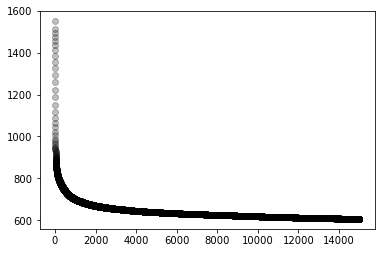

In [87]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [88]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

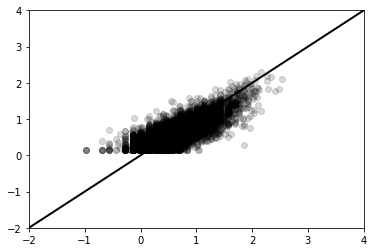

In [89]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [90]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 311.8796
[torch.FloatTensor of size 1]

In [91]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3439
[torch.FloatTensor of size 1]

In [92]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

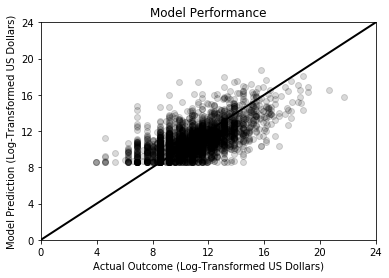

In [93]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [94]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.3899  0.0735  0.0985  0.1902  0.0105 -0.1090 -0.1128  0.0894  0.1257 -0.1592
 0.0424 -0.0380  0.0115  0.0814  0.0317 -0.2017  0.8770  0.1320 -0.1442 -0.0247
 0.2178  0.7104 -0.0734  0.1933  0.3575 -0.0768  0.9281  0.1908  0.1745 -0.0444
-0.1200 -0.3258 -0.0395  0.3213  0.0504 -0.4320  0.3249  0.0107  0.0434  0.0443
-0.1363  0.5528  0.1800  0.3041 -0.0584 -0.2711  0.2360  0.0409 -0.0189 -0.0985
-0.0477  0.1508 -0.4085  0.1222  0.2743 -0.2624  0.5774  0.4486  0.0786  0.1592
-0.3380 -0.0113 -0.1387  0.1402 -0.0737  0.0244  0.2912 -0.0260  0.2065  0.0522
-0.0443 -0.0212  0.1037  0.2717 -0.0123 -0.0800 -0.5268 -0.0616  0.1143 -0.1866
 0.2008  0.2991 -0.3427  0.2101  0.1362  0.2793 -0.2136  0.2308  0.1395 -0.1402
 0.0149 -0.2374  0.1621 -0.0113 -0.0410  0.0351  0.2507  0.0221  0.1142 -0.1210
-0.1561 -0.2329 -0.2566 -0.1773  0.1132 -0.1215 -0.6129  0.2300 -0.0620 -0.5080
-0.0809  0.1437  0.2264  0.1447 -0.2194  0.0009 -0.0273  0.2013  0.3781  0.0429
 

In [95]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0195  0.2268  0.1269  0.2863  0.2304  0.2354 -0.0029 -0.2563  0.1844  0.0140
 0.2330  0.0997  0.2821  0.2123  0.1171 -0.1890  0.4318  0.0471  0.1104  0.1031
 0.0399  0.2539  0.0986  0.1889 -0.0780  0.1782  0.3005 -0.3971 -0.0958  0.3417
-0.1110 -0.0499  0.1512  0.2424 -0.2325  0.2042  0.0439  0.1399 -0.3766  0.0070
 0.2245  0.1471  0.0955  0.0941  0.2580  0.0356 -0.0785 -0.0470  0.0423 -0.0180
 0.1407  0.1974  0.3671 -0.0724  0.2028  0.0054  0.2531 -0.1401 -0.0319  0.1561
-0.1766  0.2004  0.1090  0.2424  0.2010  0.2586 -0.1588 -0.2243  0.2431  0.0960
-0.1748 -0.1456 -0.1131  0.1160 -0.0247  0.3389 -0.3066  0.1889 -0.3369 -0.0800
-0.0600  0.0951  0.0518  0.3145  0.2588  0.2387 -0.0589  0.1857 -0.1919 -0.1238
-0.4199 -0.0524 -0.0149  0.0042 -0.1864  0.1154 -0.2906  0.3215 -0.2138  0.0037
 0.1858 -0.0691  0.0587 -0.1765 -0.1187  0.0781  0.0006  0.1996  0.1121 -0.2314
 0.2076 -0.3929  0.1020  0.3245 -0.3033 -0.4609 -0.3942 -0.1599 -0.0117 -0.0910
-

In [96]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.3523  0.1353  0.4103 -0.2545  0.1410 -0.0101  0.2964 -0.0895 -0.2071 -0.5477
-0.1070  0.3068  0.4398 -0.2503 -0.1010  0.2250 -0.0409 -0.3359 -0.1706 -0.6072
-0.2165 -0.0593 -0.3025  0.1822  0.0702  0.0126 -0.0133  0.0208  0.2716  0.3401
 0.3482  0.2568  0.1100 -0.2829  0.3088  0.3157  0.1062 -0.3939 -0.2071 -0.4926
-0.0020 -0.2394 -0.2067  0.1045 -0.1557  0.0505 -0.0516 -0.2603  0.2278 -0.0816
 0.0810 -0.2939 -0.1495  0.3283  0.0425  0.0311  0.2324  0.3569  0.1635  0.2278
 0.1769  0.3600  0.3506 -0.6295  0.1239  0.1412 -0.1932 -0.1375 -0.4107 -0.1955
-0.1072 -0.1695 -0.1068  0.0329  0.0239  0.0554  0.3353  0.5364  0.0141 -0.0820
-0.0038 -0.2721 -0.3824  0.2790 -0.1536 -0.2096  0.2818  0.3361  0.3559  0.3502
 0.1678  0.0289  0.1548  0.2191  0.0606  0.1985  0.0221 -0.6304  0.2129  0.3977

Columns 10 to 14 
-0.4207 -0.7909 -0.6441  0.4113  0.1585
-0.1418 -0.8692 -1.6458  0.3850  0.2851
 0.2388  0.2082  0.7153  0.1507  0.2807
-0.4468 -0.8320 -1.033

In [97]:
model[(6)].weight

Parameter containing:
 0.2505  0.2121 -0.3437  0.2910  0.0307 -0.4500  0.4095 -0.4800 -0.5298  0.3480
-0.0129 -0.1914  0.4685 -0.1656  0.0569 -0.1954 -0.8748 -0.0979  0.3497  0.5922
 0.5060  0.1865 -0.2819  0.0923  0.2396 -0.3469  0.0161  0.0992 -0.0929 -0.0829
-0.1008  0.4157  0.3794 -0.2536 -0.2495  0.3636  0.0930 -0.0352  0.1689 -0.5938
 0.2691  0.2755 -0.1287  0.4235 -0.0057 -0.2109  0.1288  0.0760 -0.0155  0.1063
-0.2426 -0.0050  0.2828  0.1504  0.1117 -0.1207  0.1123  0.1084 -0.1086 -0.1751
-0.0897  0.1956 -0.1229 -0.2772 -0.2493 -0.1839 -0.0280 -0.1016  0.1733 -0.2429
[torch.FloatTensor of size 7x10]

In [98]:
model[(8)].weight

Parameter containing:
-0.2025  0.1013 -0.2550 -0.2530 -0.0527  0.2305  0.3012
-0.3424 -0.1993  0.3293 -0.1367 -0.2585  0.1579 -0.1968
 0.6275 -0.8503  0.0281  0.4691  0.2462  0.1173  0.1160
 0.3021 -0.5391  0.5271  0.3483  0.5169 -0.3026  0.1032
 0.6402 -0.5167  0.2641  0.3506  0.2413  0.2255 -0.0710
[torch.FloatTensor of size 5x7]

In [99]:
model[(10)].weight

Parameter containing:
 0.1222  0.1789 -0.3815 -0.1107  0.2102
 0.0730 -0.3694  0.1462 -0.2558 -0.2795
 0.0073  0.4303  0.3968  0.3337  0.7017
[torch.FloatTensor of size 3x5]

In [100]:
model[(12)].weight

Parameter containing:
 0.1187 -0.2220  0.4555
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [101]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [102]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [103]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

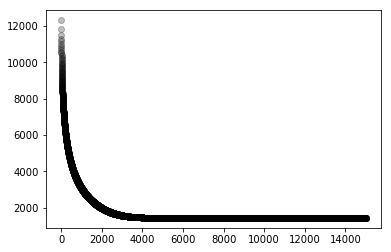

In [104]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [105]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

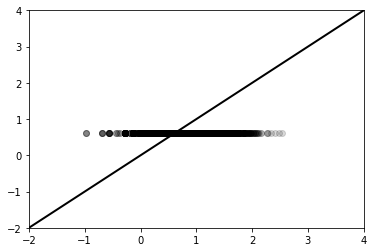

In [106]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [107]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 475.4071
[torch.FloatTensor of size 1]

In [108]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-05 *
 -5.1141
[torch.FloatTensor of size 1]

In [109]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

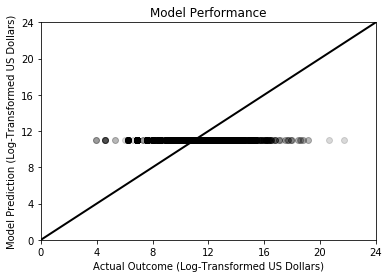

In [110]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [111]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1734 -0.0907 -0.1383 -0.0138  0.1184  0.0672 -0.0168 -0.0763 -0.0766 -0.0553
 0.0025 -0.0322  0.0206  0.0933 -0.0202 -0.0463 -0.0196  0.1319  0.0725 -0.0230
 0.1851  0.1396  0.1914 -0.1268  0.0425 -0.1596 -0.0762 -0.0936 -0.1352  0.1931
-0.0290 -0.0449  0.0887  0.1095  0.0383 -0.0047 -0.0743 -0.0654  0.0297 -0.1062
-0.0970 -0.0361 -0.0403 -0.0287 -0.1696  0.1652 -0.0925 -0.0577  0.0294  0.1777
 0.0020 -0.1009  0.0448 -0.0881 -0.0965 -0.0230 -0.0028 -0.0774 -0.1254 -0.1793
-0.0864 -0.0915 -0.0747  0.0185 -0.0210 -0.0647 -0.1266 -0.0025  0.0814 -0.0279
-0.0670 -0.0679 -0.0281 -0.1455 -0.1277  0.0766 -0.0464 -0.1202 -0.0615 -0.0080
 0.0909  0.1260 -0.0957  0.1545  0.0523 -0.1670  0.1363 -0.1038  0.0940 -0.1466
 0.0934 -0.0498 -0.1456 -0.0714 -0.0017 -0.0384  0.0104  0.1491  0.0655  0.0574
-0.0470  0.0203  0.0120  0.1247 -0.1224 -0.0970  0.0202 -0.1769 -0.0238  0.0020
-0.0100  0.1031 -0.1104  0.0936 -0.1140  0.0142 -0.0829  0.0050 -0.0543  0.0443
-

In [112]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0848 -0.2252 -0.2038 -0.1465  0.1190  0.1906 -0.1155 -0.0602 -0.2036  0.0509
-0.0479 -0.1650 -0.0679  0.1388  0.0362 -0.1215 -0.1780 -0.1329  0.1794  0.0740
 0.0747 -0.0587  0.1313 -0.0494 -0.0913  0.1848  0.1215  0.1179  0.1599  0.1652
-0.1501 -0.1155  0.1852 -0.1925 -0.0408  0.1425  0.0784 -0.1311  0.0784 -0.0427
-0.0318 -0.1659  0.1252  0.2097  0.2043 -0.0701  0.0361  0.1450  0.2320  0.0186
-0.1322  0.0604 -0.1017 -0.0636 -0.1931  0.0576  0.1403  0.0252 -0.0699  0.1493
-0.1457  0.0525  0.0562  0.1685  0.1236  0.0848  0.1566  0.1610 -0.1538 -0.0322
 0.0056 -0.0700  0.1474 -0.0141  0.0440  0.2137  0.0686  0.1593  0.2099  0.2030
 0.0975  0.2110  0.0852  0.1011  0.1662 -0.1247  0.0041 -0.1711  0.1336  0.0111
-0.0248  0.0069  0.0190  0.0200 -0.0082  0.1784 -0.1517  0.0702  0.0930 -0.1454
 0.1670  0.0809 -0.1110 -0.1037  0.1521 -0.0646 -0.1469 -0.1369  0.1636  0.0513
-0.1337  0.1791  0.2256  0.0290  0.1510 -0.1125 -0.0511  0.0131  0.1841  0.2192
-

In [113]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1292  0.0019 -0.0064  0.2490  0.1177  0.1068  0.1374  0.1657  0.0742 -0.0869
 0.0503 -0.0707  0.0736 -0.2564  0.1272  0.1381  0.0920  0.1696 -0.1598 -0.2526
-0.0075 -0.1116 -0.0918 -0.0202 -0.2385  0.1948 -0.0869 -0.0897 -0.0552 -0.1679
 0.2675  0.1859 -0.0078  0.2109 -0.0461  0.0622 -0.2221  0.2493 -0.1347  0.1324
-0.0112 -0.1762  0.0794  0.2342 -0.1309  0.1246 -0.2048 -0.1567 -0.0435 -0.2094
 0.1200  0.0334  0.1619  0.1817 -0.0649  0.2139 -0.2499 -0.0191 -0.0431 -0.1386
-0.0435  0.1447  0.0783  0.2461 -0.0331  0.2006  0.1766 -0.0110 -0.2387  0.0957
-0.0910  0.1104 -0.0199  0.1337  0.0207  0.0281  0.0363 -0.1677  0.2042  0.1722
-0.1743  0.0755  0.0275  0.1632 -0.1689  0.1062  0.0923 -0.1504  0.1085 -0.1764
-0.0508 -0.1639  0.0288  0.2264  0.2036 -0.0773 -0.0073  0.1799 -0.1332 -0.0250

Columns 10 to 14 
-0.1930  0.0930 -0.1249  0.2535  0.2232
 0.1632  0.0021  0.2072 -0.0250  0.2400
-0.2059  0.1408 -0.2234  0.1523 -0.0363
 0.0710 -0.0333 -0.178

In [114]:
model[(6)].weight

Parameter containing:
 0.1979  0.0590 -0.0446 -0.1203  0.0753  0.1508 -0.0080  0.2587 -0.3220 -0.1011
-0.1903  0.1086  0.0159 -0.0312  0.0736 -0.1013  0.2119 -0.0858  0.2230  0.2205
 0.3393 -0.1037 -0.2798 -0.2005  0.2044 -0.0641  0.2240 -0.0848 -0.0861 -0.0088
-0.0069  0.2797 -0.1178  0.2161  0.1035 -0.2569 -0.1761 -0.0842  0.2587  0.2471
-0.0570 -0.0820 -0.0845 -0.1860  0.1419 -0.0964  0.2802  0.2012 -0.1892 -0.1052
-0.0717  0.1625  0.0333 -0.3344  0.2407  0.1624 -0.1480  0.1571  0.2002  0.0337
-0.0346  0.3054  0.1602 -0.3031  0.0128 -0.1717  0.0932 -0.2224  0.2892  0.0974
[torch.FloatTensor of size 7x10]

In [115]:
model[(8)].weight

Parameter containing:
 0.0626 -0.0200 -0.0232 -0.3178 -0.0988  0.0919  0.2770
-0.1365  0.2600 -0.0767 -0.0757  0.0113 -0.1121  0.3203
 0.3395 -0.0004 -0.3129 -0.2867  0.1091  0.2120 -0.3205
 0.2622  0.1919 -0.2104  0.0003  0.2014  0.1533  0.1744
-0.2255  0.1447  0.2179  0.0131  0.0341  0.0470 -0.2704
[torch.FloatTensor of size 5x7]

In [116]:
model[(10)].weight

Parameter containing:
-0.4446 -0.2531 -0.1298  0.2859  0.2755
-0.0580 -0.0657 -0.2071  0.0303  0.1950
 0.2231  0.1847 -0.0610  0.2503  0.2007
[torch.FloatTensor of size 3x5]

In [117]:
model[(12)].weight

Parameter containing:
 0.0703 -0.5375  0.2998
 0.1857 -0.0525  0.5118
[torch.FloatTensor of size 2x3]

In [118]:
model[(14)].weight

Parameter containing:
 0.6393  0.3417
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [119]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [120]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(34, 1))

In [121]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

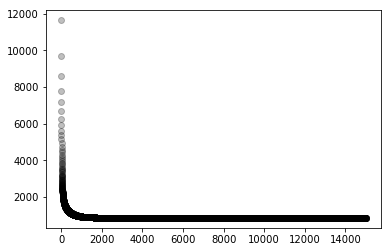

In [122]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [123]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

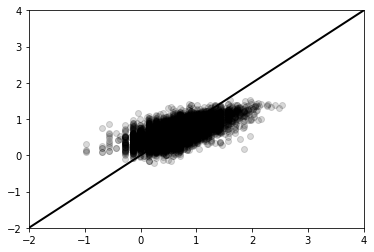

In [124]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [125]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 281.9708
[torch.FloatTensor of size 1]

In [126]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4069
[torch.FloatTensor of size 1]

In [127]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

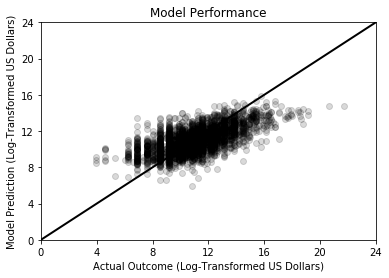

In [128]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [129]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0092  0.0193  0.0064  0.1635  0.1894 -0.0317  0.0176 -0.0061 -0.0176  0.0217

Columns 10 to 19 
-0.0124  0.0104  0.0038 -0.0213  0.0108 -0.0180 -0.0005  0.0098 -0.0057  0.0085

Columns 20 to 29 
-0.0036  0.0150  0.0048  0.0379 -0.0004 -0.0519  0.0887  0.0171 -0.0066  0.0034

Columns 30 to 33 
-0.0292  0.0208  0.0035  0.0092
[torch.FloatTensor of size 1x34]